In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


In [ ]:
# Load dataset
df = pd.read_csv("data\processed\banksim_feature_engineered.csv")

# Basic info
df.shape, df.head()


((594643, 10),
    step       customer  age gender zipcodeOri       merchant zipMerchant  \
 0     0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
 1     0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
 2     0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
 3     0  'C1760612790'  '3'    'M'    '28007'   'M348934600'     '28007'   
 4     0   'C757503768'  '5'    'M'    '28007'   'M348934600'     '28007'   
 
               category  amount  fraud  
 0  'es_transportation'    4.55      0  
 1  'es_transportation'   39.68      0  
 2  'es_transportation'   26.89      0  
 3  'es_transportation'   17.25      0  
 4  'es_transportation'   35.72      0  )

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [4]:
df.describe(include="all")


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
count,594643.000000,594643,594643,594643,594643,594643,594643,594643,594643.000000,594643.000000
unique,NaN,4112,8,4,1,50,1,15,NaN,NaN
top,NaN,'C1978250683','2','F','28007','M1823072687','28007','es_transportation',NaN,NaN
freq,NaN,265,187310,324565,594643,299693,594643,505119,NaN,NaN
mean,94.986827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.890135,0.012108
std,51.053632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.402831,0.109369
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.740000,0.000000
50%,97.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.900000,0.000000
75%,139.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.540000,0.000000


In [5]:
df.isnull().sum()


step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [ ]:
df.duplicated().sum()


np.int64(0)

In [7]:
# Fraud distribution
df["fraud"].value_counts(normalize=True) * 100


fraud
0    98.789189
1     1.210811
Name: proportion, dtype: float64

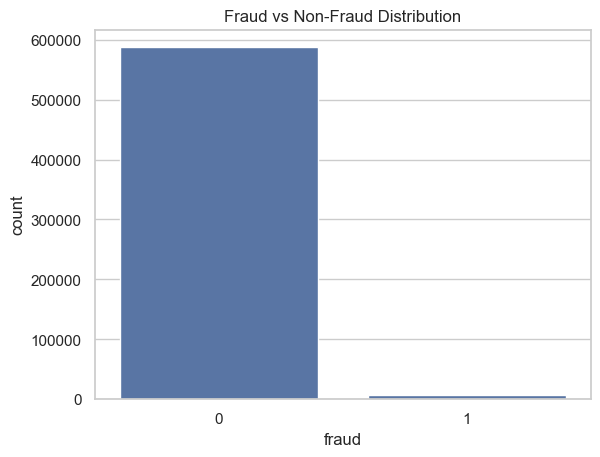

In [8]:
sns.countplot(x="fraud", data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()


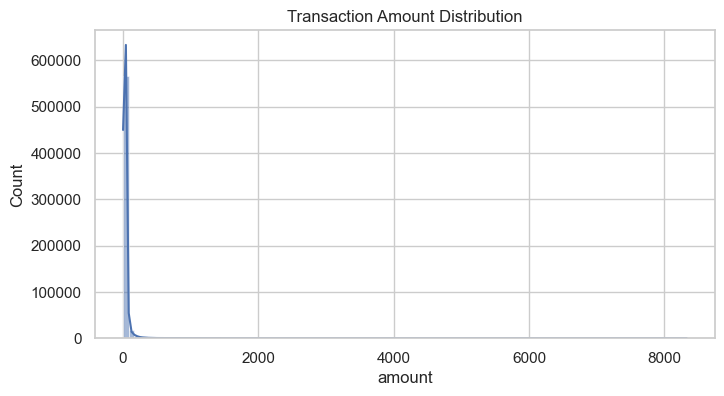

In [9]:
# Amount distribution
plt.figure(figsize=(8,4))
sns.histplot(df["amount"], bins=100, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()


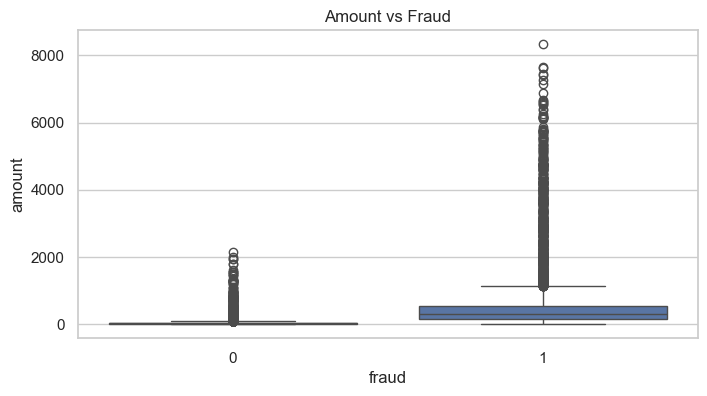

In [10]:
# Fraud vs non-fraud amounts
plt.figure(figsize=(8,4))
sns.boxplot(x="fraud", y="amount", data=df)
plt.title("Amount vs Fraud")
plt.show()


In [11]:
df.groupby("fraud")["amount"].describe()


,count,mean,std,min,25%,50%,75%,max
fraud,,,,,,,,
0,587443.0,31.847230,31.470876,0.00,13.59,26.610,41.8950,2144.86
1,7200.0,530.926551,835.587112,0.03,159.98,319.175,548.9775,8329.96


In [12]:
category_fraud = (
    df.groupby("category")["fraud"]
    .mean()
    .sort_values(ascending=False)
)

category_fraud.head(10)


category
'es_leisure'              0.949900
'es_travel'               0.793956
'es_sportsandtoys'        0.495252
'es_hotelservices'        0.314220
'es_otherservices'        0.250000
'es_home'                 0.152064
'es_health'               0.105126
'es_tech'                 0.066667
'es_wellnessandbeauty'    0.047594
'es_hyper'                0.045917
Name: fraud, dtype: float64

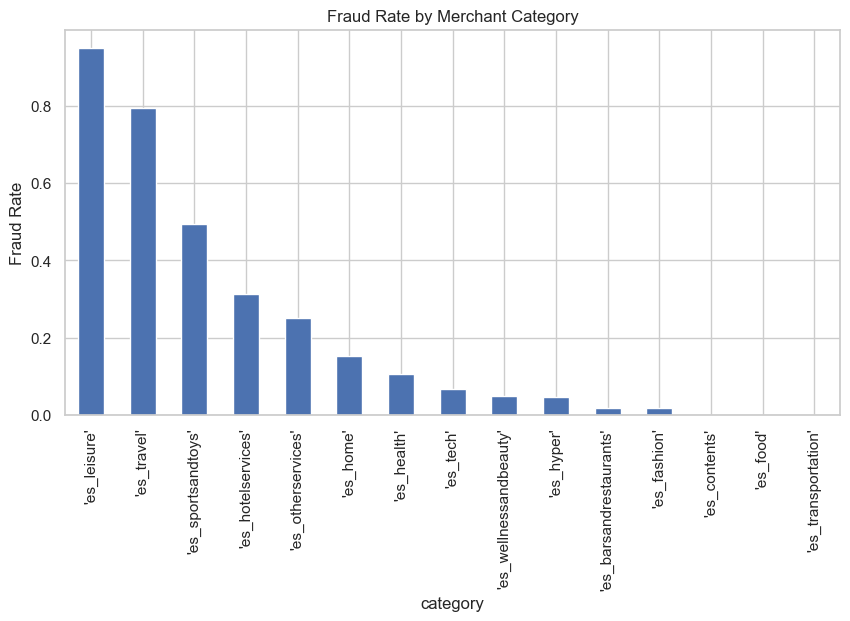

In [13]:
plt.figure(figsize=(10,5))
category_fraud.plot(kind="bar")
plt.title("Fraud Rate by Merchant Category")
plt.ylabel("Fraud Rate")
plt.show()


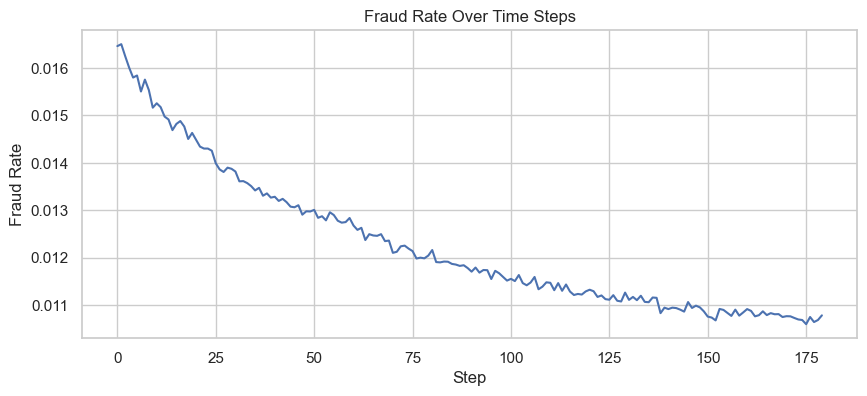

In [14]:
# Fraud over time
fraud_over_time = df.groupby("step")["fraud"].mean()

plt.figure(figsize=(10,4))
fraud_over_time.plot()
plt.title("Fraud Rate Over Time Steps")
plt.xlabel("Step")
plt.ylabel("Fraud Rate")
plt.show()


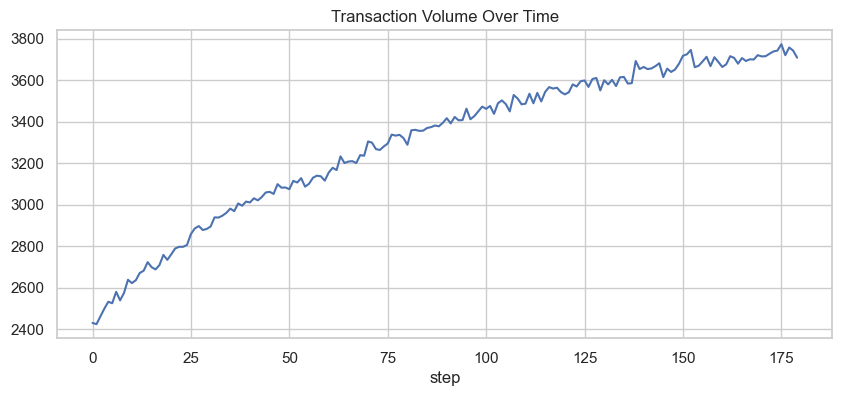

In [15]:
# Transaction volume over time
df.groupby("step").size().plot(figsize=(10,4))
plt.title("Transaction Volume Over Time")
plt.show()


In [16]:
# Transactions per customer
txn_per_customer = df.groupby("customer").size()

txn_per_customer.describe()


count    4112.000000
mean      144.611625
std        42.788212
min         5.000000
25%       130.000000
50%       165.000000
75%       173.000000
max       265.000000
dtype: float64

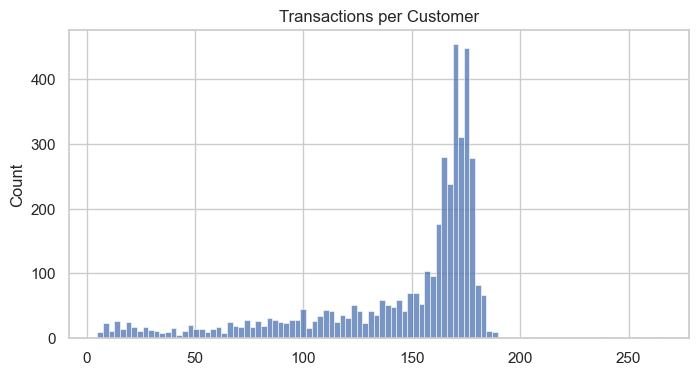

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(txn_per_customer, bins=100)
plt.title("Transactions per Customer")
plt.show()


In [18]:
# Fraud rate per customer
customer_fraud_rate = df.groupby("customer")["fraud"].mean()

customer_fraud_rate.sort_values(ascending=False).head(10)


customer
'C910454738'     0.945652
'C2004941826'    0.944444
'C381007057'     0.890000
'C1572610482'    0.881188
'C617723960'     0.869565
'C2113737065'    0.868132
'C2060410910'    0.846154
'C483912131'     0.816327
'C1809646275'    0.800000
'C1817318774'    0.776786
Name: fraud, dtype: float64

In [19]:
# Same zip vs different zip transactions
df["same_zip"] = df["zipcodeOri"] == df["zipMerchant"]

df.groupby("same_zip")["fraud"].mean()


same_zip
True    0.012108
Name: fraud, dtype: float64

Based on the exploratory analysis of the BankSim transactional dataset, the following key observations were identified:

Severe Class Imbalance
The dataset is highly imbalanced, with approximately 1.2% fraudulent transactions. This reflects real-world payment systems and justifies the use of unsupervised /semi-supervised anomaly detection techniques rather than relying solely on supervised classification.

Transaction Amount Behavior
Fraudulent transactions do not consistently have higher average amounts compared to legitimate ones; however, they exhibit significantly higher variance and extreme outliers. This indicates that fraud is better characterized as anomalous behavior rather than simple threshold breaches.

Merchant Category Influence
Fraud rates vary substantially across merchant categories. While some categories dominate transaction volume, others show disproportionately higher fraud rates, demonstrating that merchant category is an important contextual feature for fraud detection.

Temporal Patterns in Fraud
Fraud occurrences are not uniformly distributed over time and show clustering across specific time steps. This bursty behavior suggests that temporal aggregation features (e.g., recent transaction frequency) can be effective fraud indicators.

Customer-Level Behavioral Signals
The majority of customers exhibit normal transaction behavior, while a small subset of customers accounts for a large fraction of fraudulent activity. This highlights the importance of behavioral and historical features at the customer level.

Location Consistency as a Fraud Signal
Transactions where the customer’s origin zipcode differs from the merchant’s zipcode show a higher fraud rate, indicating that location inconsistency is a strong fraud signal and motivates the use of spatial or distance-based features.